Processing *nominal* Image with Dimensions: (956, 684)
Points File Was Not Found. No Correction done.


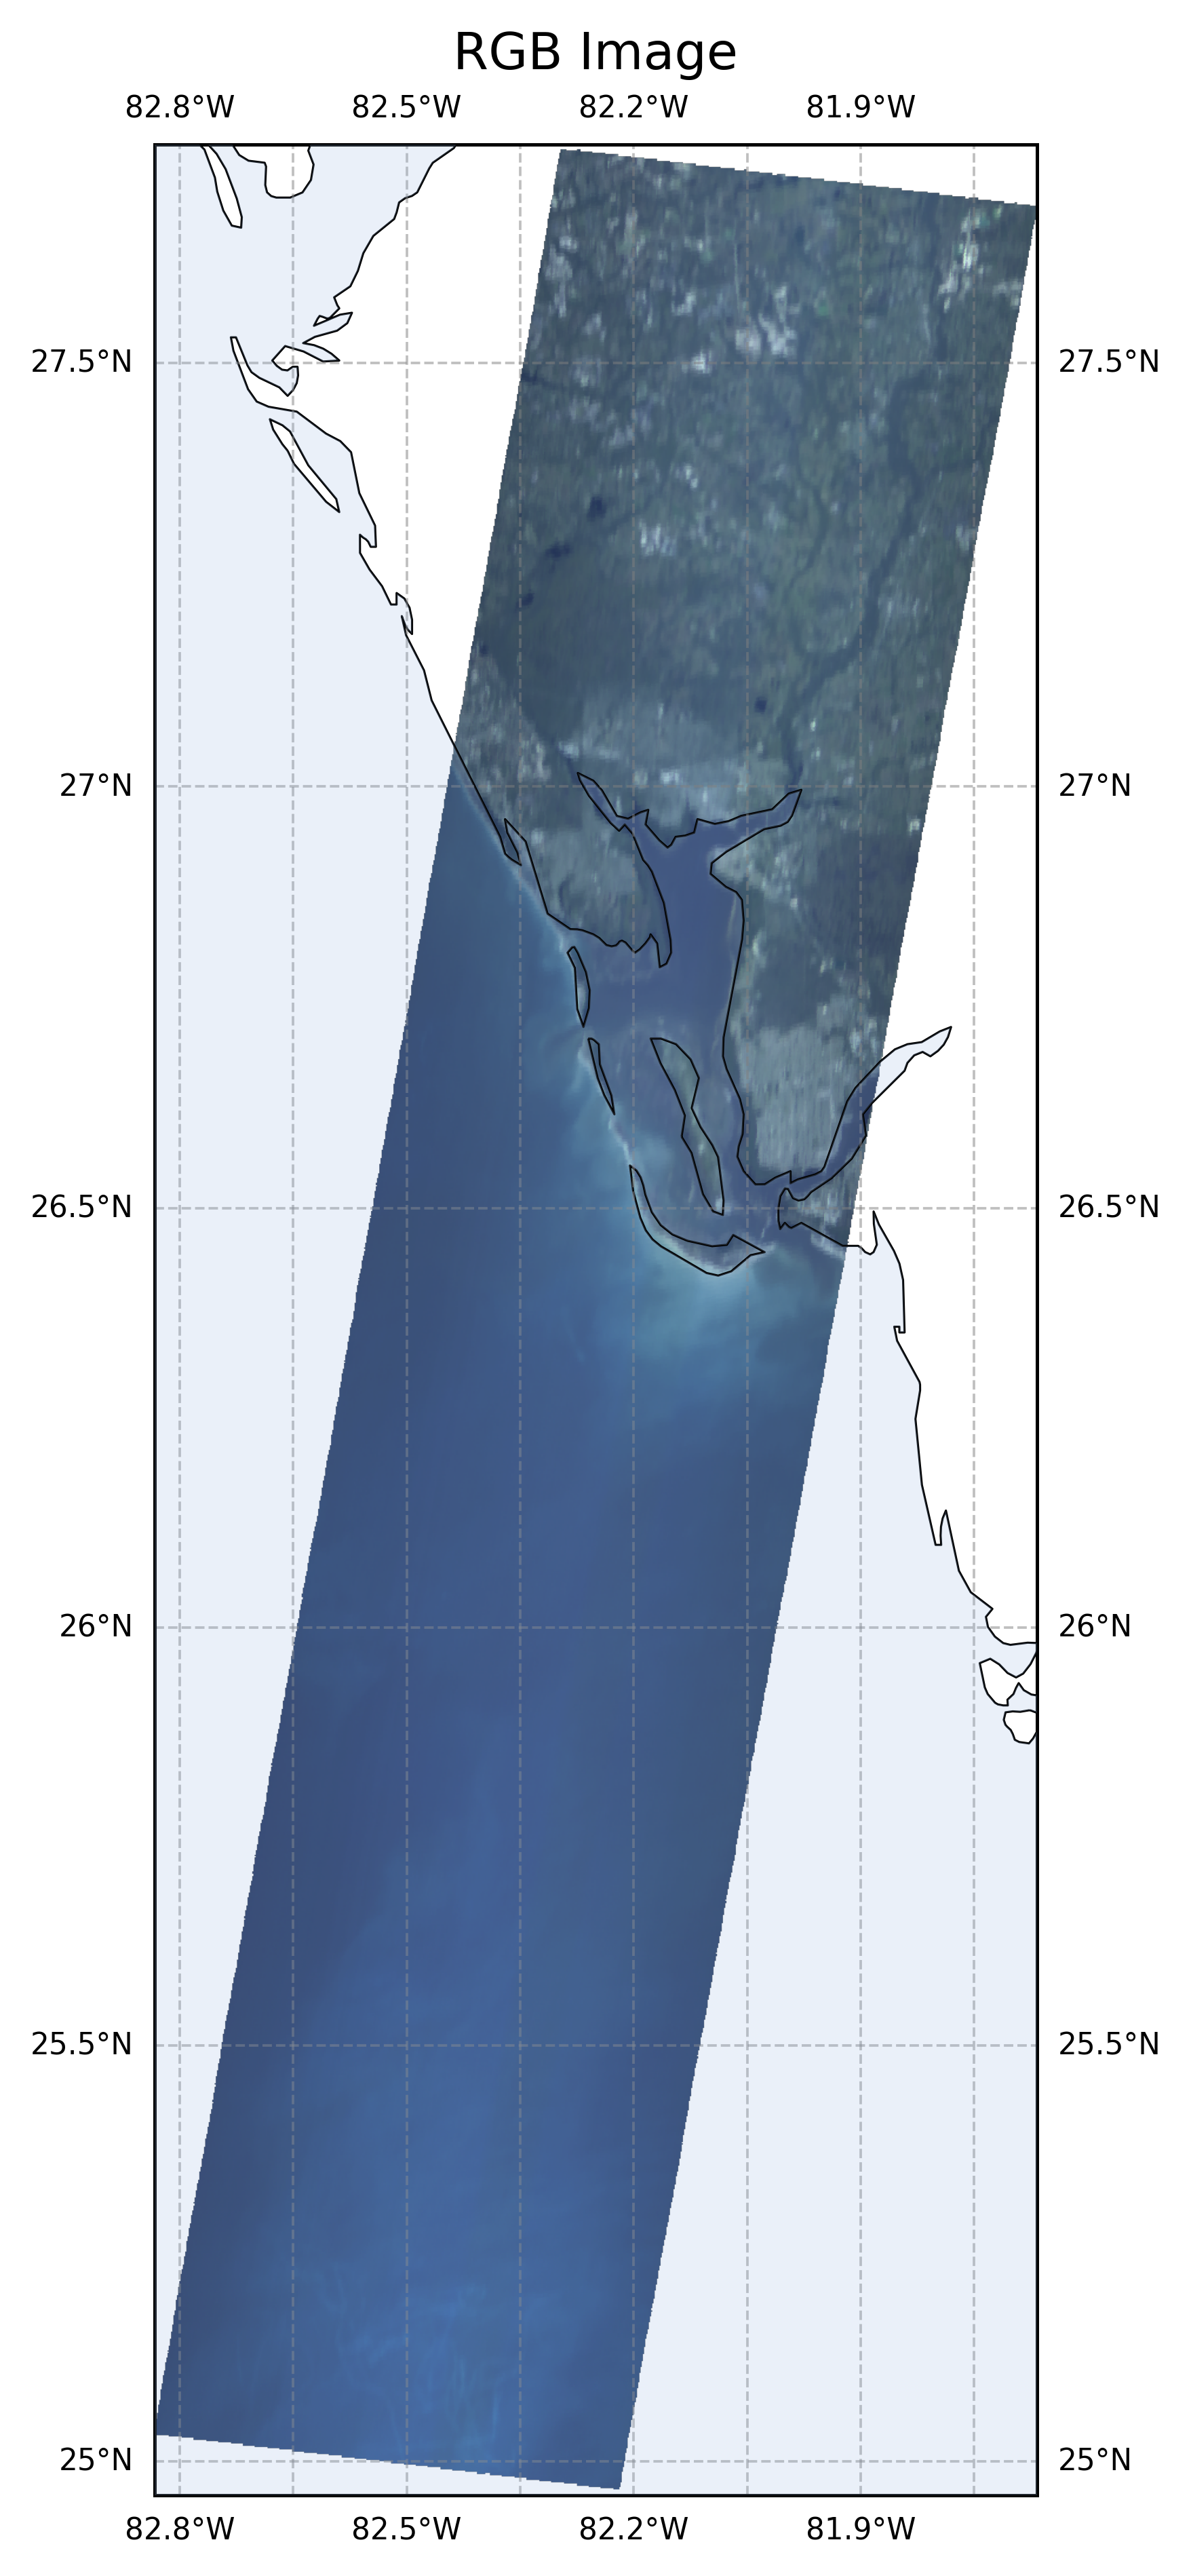

CPU times: user 14.8 s, sys: 1.37 s, total: 16.1 s
Wall time: 16.2 s


In [1]:
%%time
# Satellite Object
from hypsoreader import Satellite

# Plot Fn
from hypsoreader.plot import write_rgb_map, write_rgb, plot_chlorophyll

#
from hypsoreader.georeference import generate_geotiff
from hypsoreader.spectra import print_this

from hypsoreader.exportfiles import write_h1data_as_NetCDF4, print_nc

hypso_dir = r"/Users/alvaroflores/Documents/florida_2023-01-07_1524Z"
# hypso_dir = r"D:\4th Semester\Code\Datasets\Bundles\Bundle2\florida_2023-01-07_1524Z"
# hypso_dir = r"/Users/alvaroflores/Documents/mjosa_2023-06-15_0948Z"
satobj = Satellite(hypso_dir)

write_rgb_map(satobj)


In [4]:
import matplotlib.pyplot as plt
import numpy as np
spectra = satobj.get_spectra([60.7776,11.0895],postype="coord") # Mjosa
spectra = satobj.get_spectra([26.1,-82.4],postype="coord") # Florida
spectra.head()

Dataset CRS:  EPSG:32617
(lat, lon) -→ (X, Y) : (60.7776, 11.0895) -→ (-50606, 33912)
Dataset CRS:  EPSG:32617
(lat, lon) -→ (X, Y) : (26.1, -82.4) -→ (1081, 582)


lat            lon       X      Y  wl387_85  wl391_4  wl394_96  \
0  2887510.856  360001.501472  1081.0  582.0       0.0      0.0       0.0   

     wl398_51    wl402_07    wl405_62  ...   wl771_76   wl775_18    wl778_6  \
0  442.925561  473.166822  498.177724  ...  48.480225  49.887719  51.203078   

   wl782_02   wl785_44   wl788_86   wl792_28   wl795_69   wl799_11    wl802_52  
0  51.17866  53.895886  58.285916  65.014047  81.373952  97.196487  116.619821  

[1 rows x 124 columns]

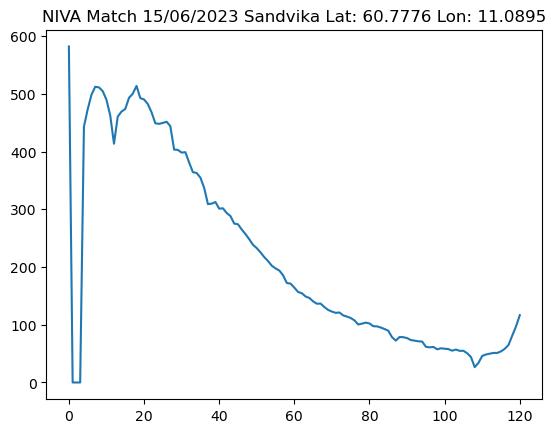

Min Lat:  24.95922
Max Lat:  27.757711
Min Lon:  -82.83317
Max Lon:  -81.66693


In [5]:
plt.figure()
val = np.array(spectra)[0,3:]
plt.plot(val)
plt.title("NIVA Match 15/06/2023 Sandvika Lat: 60.7776 Lon: 11.0895")
plt.show()

import numpy as np
print("Min Lat: ",np.nanmin(satobj.info["lat"]))
print("Max Lat: ",np.nanmax(satobj.info["lat"]))
print("Min Lon: ",np.nanmin(satobj.info["lon"]))
print("Max Lon: ",np.nanmax(satobj.info["lon"]))

In [6]:
write_h1data_as_NetCDF4(satobj, path_to_save=r"/Users/alvaroflores/Desktop/demo.nc")
#print_nc(r"/Users/alvaroflores/Desktop/caca.nc")

{'top_folder_name': '/Users/alvaroflores/Documents/florida_2023-01-07_1524Z', 'folder_name': 'florida_2023-01-07_1524Z', 'flags': '0x00000200', 'camera_ID': 2, 'frame_count': 956, 'exposure': 19.9921, 'fps': 22, 'row_count': 684, 'column_count': 1080, 'sample_divisor': 1, 'bin_factor': 9, 'aoi_x': 428, 'aoi_y': 266, 'gain': 0, 'temp_log_period_ms': 10000, 'unixtime': 1673105079, 'iso_time': '2023-01-07T15:24:39', 'solar_zenith_angle': 58.05193, 'solar_azimuth_angle': 144.01435, 'sat_zenith_angle': 34.60704, 'sat_azimuth_angle': 97.04298, 'background_value': 72, 'x_start': 428, 'x_stop': 1508, 'y_start': 266, 'y_stop': 950, 'exp': 0.019992100000000002, 'image_height': 684, 'image_width': 120, 'im_size': 82080, 'capture_type': 'nominal', 'latc': 26.35599, 'lonc': -82.24705, 'lat': array([[27.757711, 27.757607, 27.757504, ..., 27.689606, 27.689508,
        27.689413],
       [27.754818, 27.754715, 27.75461 , ..., 27.686716, 27.686619,
        27.686523],
       [27.751925, 27.751822, 27.7

In [7]:
import netCDF4 as nc
print_nc(r"/Users/alvaroflores/Desktop/demo.nc")

--- GROUP: "/" ---
DIMENSIONS: frames, lines, bands, 
VARIABLES: 
ATTRIBUTES: instrument, institution, resolution, location_description, license, naming_authority, date_processed, date_aquired, publisher_name, publisher_url, processing_level, radiometric_file, smile_file, destriping_file, spectral_file, 
SUB-GROUPS: navigation, products, scan_line_attributes, metadata, 

  --- GROUP: "/navigation" ---
  DIMENSIONS: 
  VARIABLES: unixtime, sensor_zenith, sensor_azimuth, solar_zenith, solar_azimuth, latitude, longitude, 
  ATTRIBUTES: iso8601time, 
  SUB-GROUPS: 

  --- GROUP: "/products" ---
  DIMENSIONS: 
  VARIABLES: Lt, 
  ATTRIBUTES: 
  SUB-GROUPS: 

  --- GROUP: "/scan_line_attributes" ---
  DIMENSIONS: 
  VARIABLES: scan_quality_flags, 
  ATTRIBUTES: 
  SUB-GROUPS: 

  --- GROUP: "/metadata" ---
  DIMENSIONS: 
  VARIABLES: 
  ATTRIBUTES: 
  SUB-GROUPS: FGDC, HYPSO, 

    --- GROUP: "/metadata/FGDC" ---
    DIMENSIONS: 
    VARIABLES: 
    ATTRIBUTES: 
    SUB-GROUPS: Indentificati

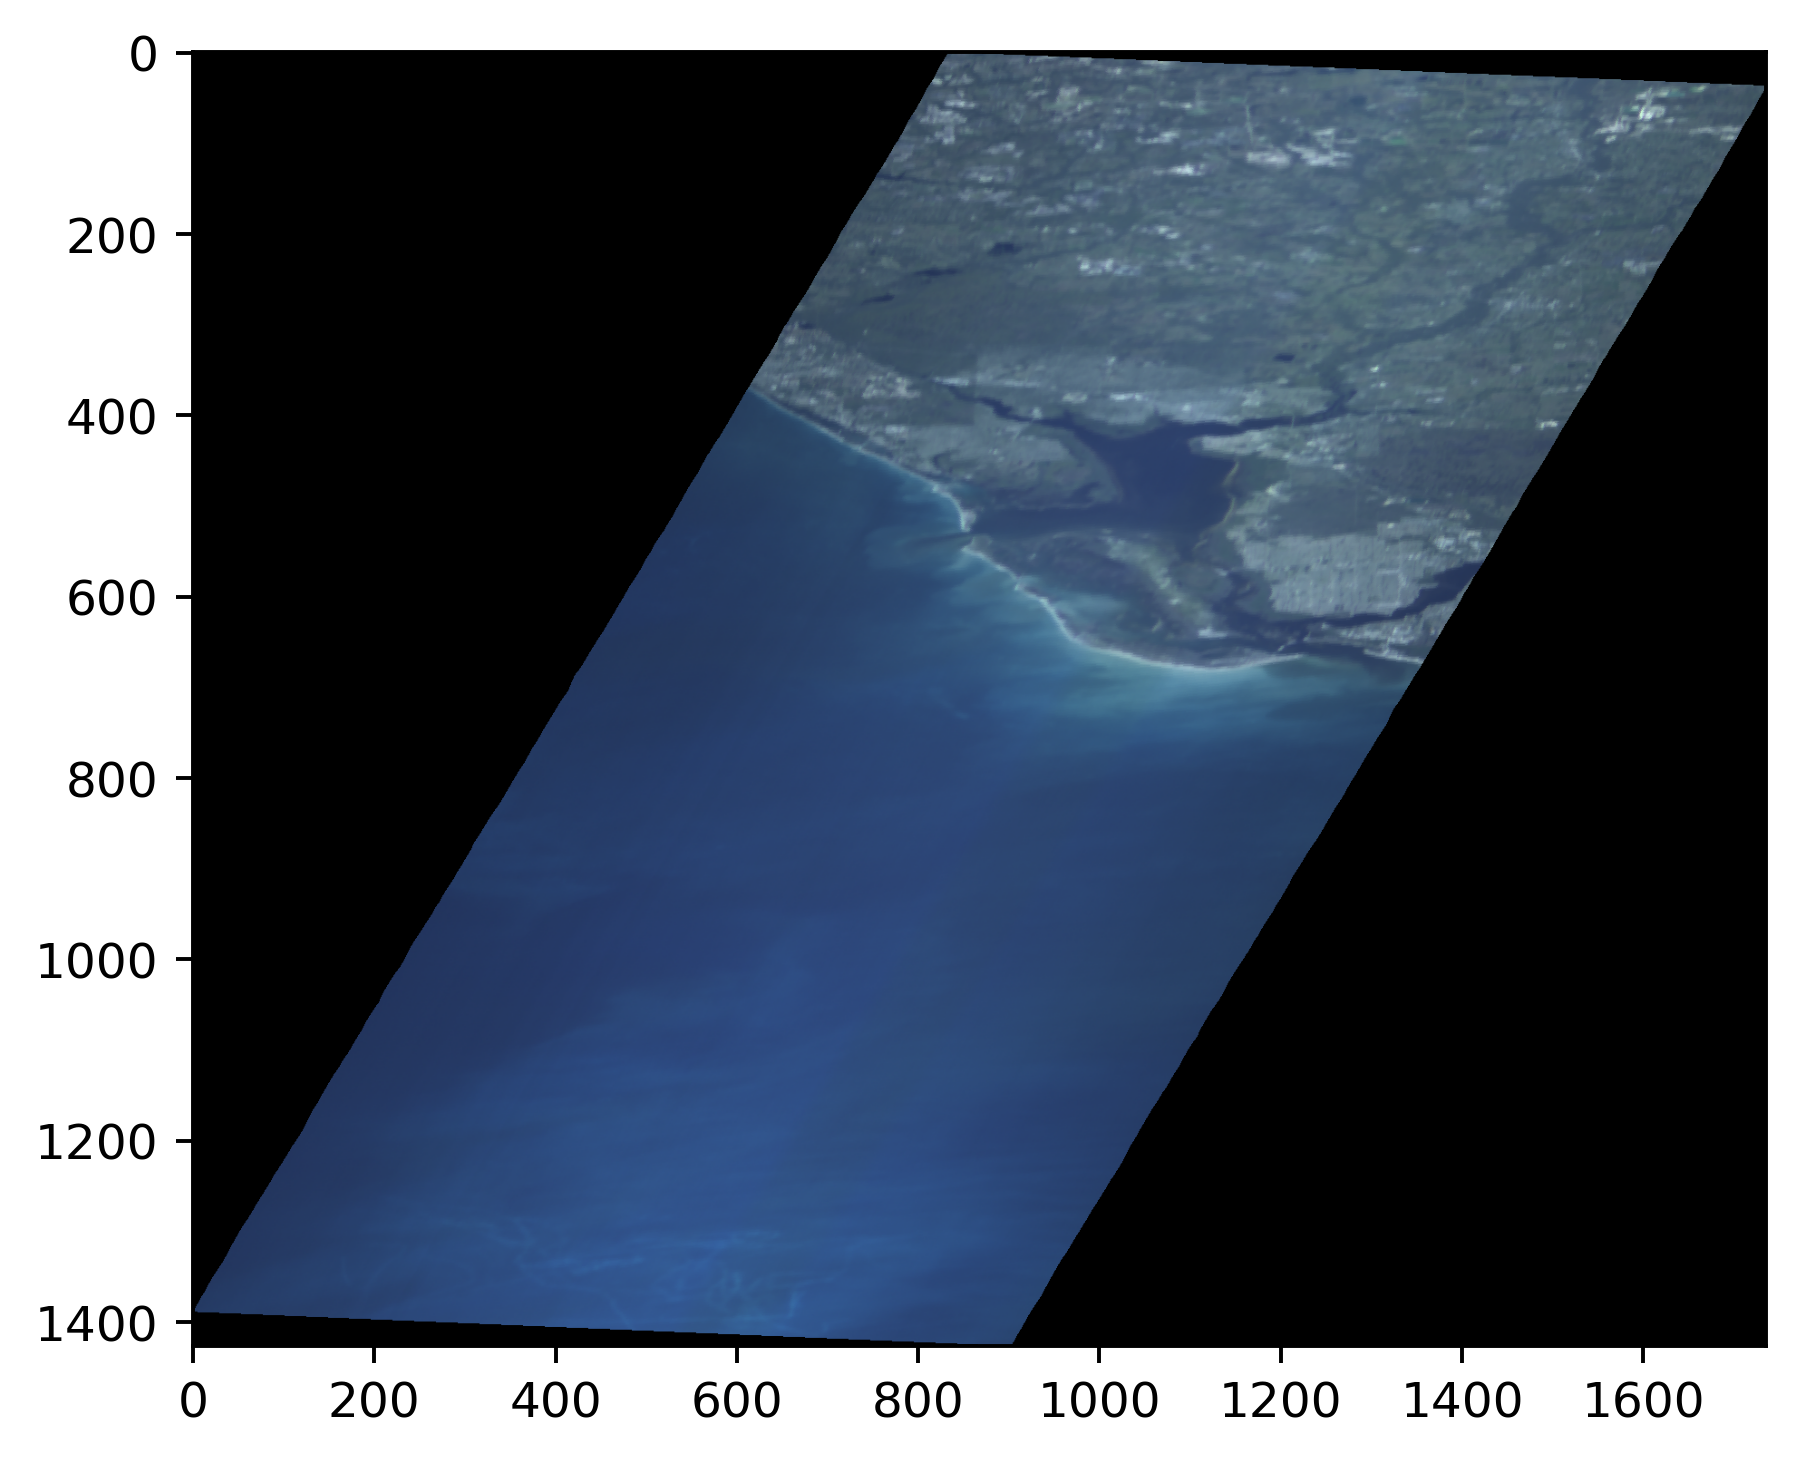

In [8]:
rgb_img = write_rgb(satobj,path_to_save=r"/Users/alvaroflores/Desktop/image_demo.png")

Chl Range:  [0.01, 100]


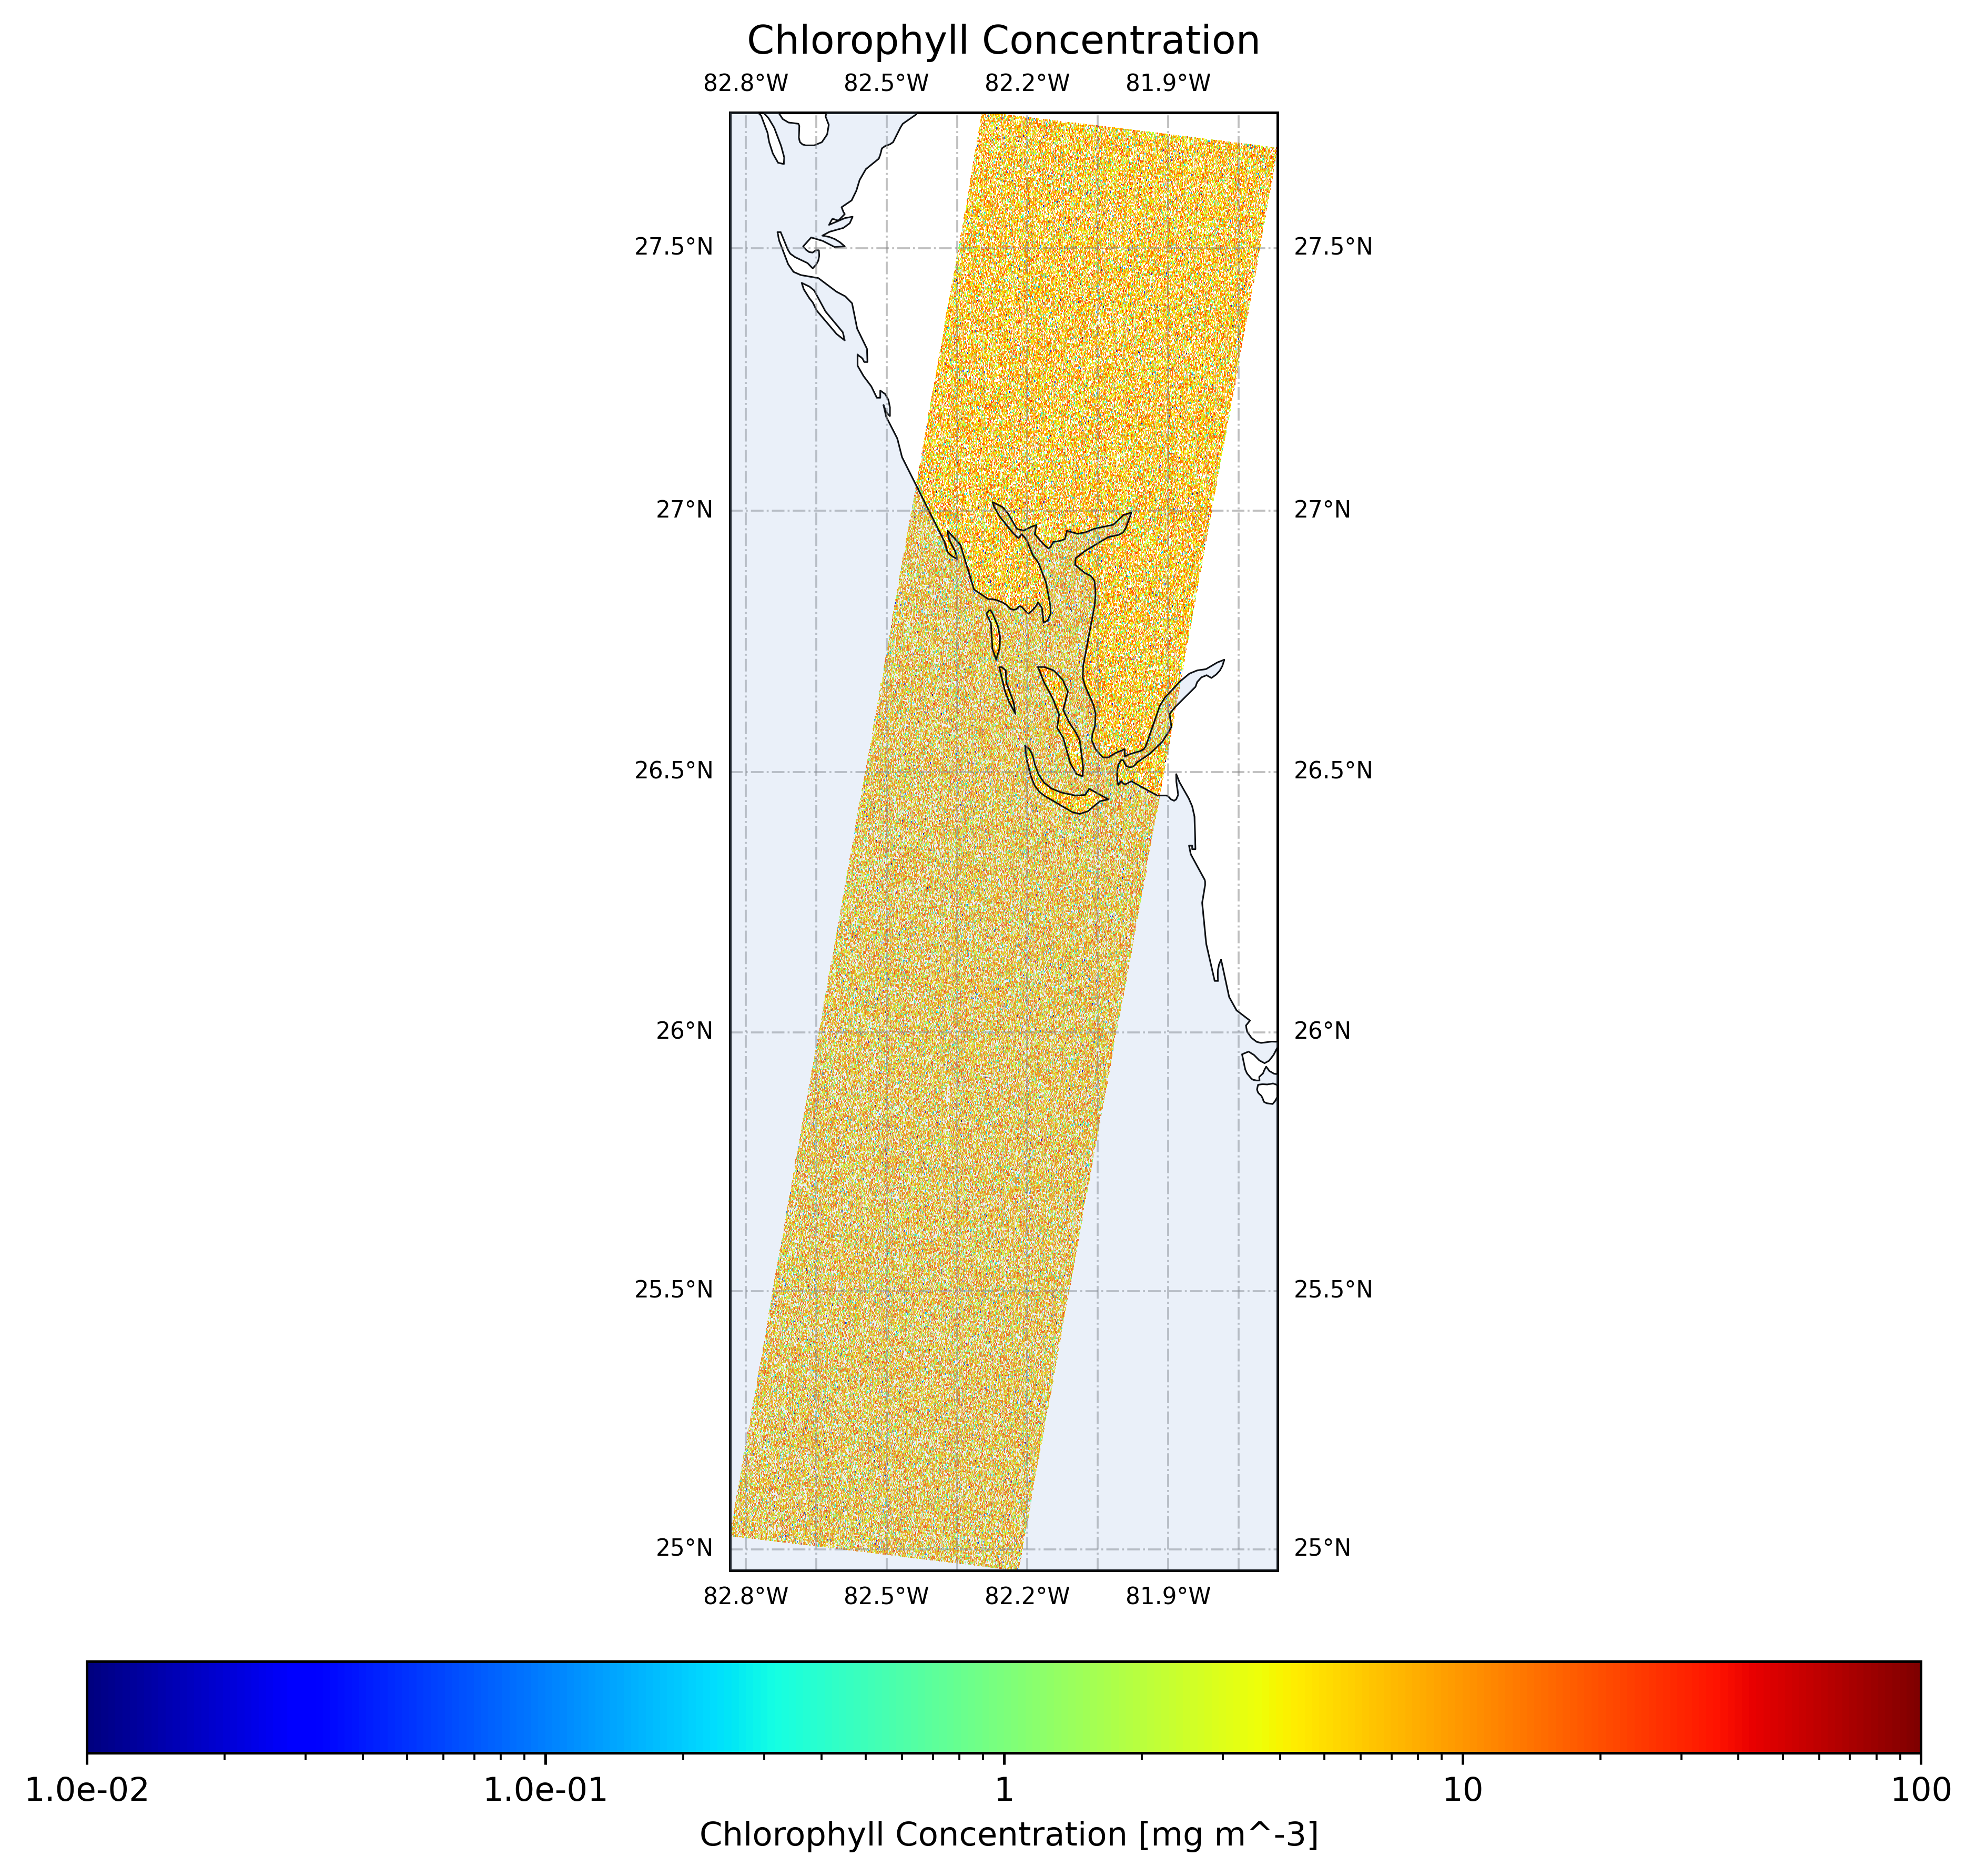

In [9]:
import numpy as np
chl_array = np.random.normal(1, 10, size=satobj.spatialDim)

plot_chlorophyll(satobj,chl_array)